In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [4]:
def ReadData(fileLocation):
    #read data in relation to format
    try:
        if fileLocation.endswith('.csv'): #
            dataRead =pd.DataFrame(pd.read_csv(fileLocation))
        elif fileLocation.endswith('.tsv'): 
            dataRead = np.genfromtxt(fileLocation, delimiter = " " )
            x = dataRead[:,0]
            y= dataRead[:,1]
            dataRead = pd.DataFrame({'X':x,'Y':y})
        elif fileLocation.endswith('xlsx'):
            dataRead = pd.read_excel(fileLocation)
        else:
            # Unsupported file format
            raise ValueError(f"Unsupported file format: {fileLocation}")
    except Exception as e:
        print(f"Error reading file: {e}")
        return None

    return dataRead



In [5]:
data = ReadData('datasets/anotherfileformat.tsv')

In [6]:
data

,X,Y
0,-5.872840,0.048083
1,-5.872835,0.048692
2,-5.872840,0.048083
3,-5.872835,0.049300
4,-5.872835,0.047474
...,...,...
1995,-5.872690,0.048387
1996,-5.872695,0.047779
1997,-5.872705,0.048996
1998,-5.872715,0.048387


In [12]:
voltage = data["Y"]
x_value = data["X"]

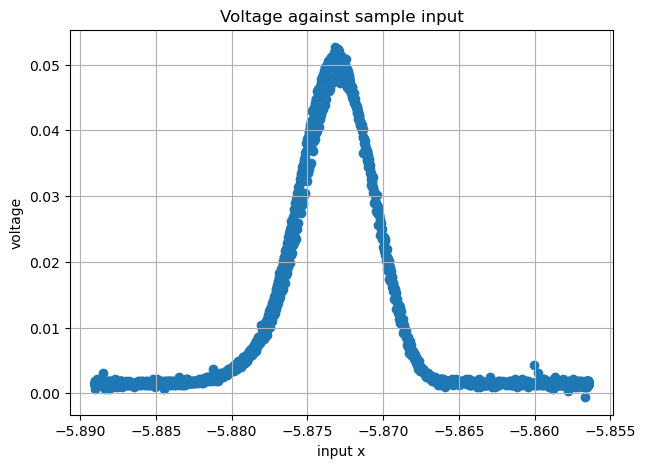

In [8]:
plt.figure(figsize =(7,5))
plt.scatter(x_value,voltage)
plt.xlabel("input x")
plt.ylabel("voltage")
plt.title("Voltage against sample input")
plt.grid()
plt.show()

In [9]:
data.describe()

,X,Y
count,2000.000000,2000.000000
mean,-5.872742,0.015910
std,0.009841,0.019697
min,-5.889020,-0.000609
25%,-5.880585,0.001522
50%,-5.872723,0.002130
75%,-5.864896,0.036823
max,-5.856465,0.052648


In [10]:
#looking for the max directly
def DirectMaxSearch(Voltage):
    maxIndex = np.argmax(Voltage)
    return x_value[maxIndex]

In [14]:
directMax = DirectMaxSearch(voltage)


In [16]:
print(f'The index of the maximum value is {directMax}')

The index of the maximum value is -5.873195


In [17]:
#Looking for max using the guassian fit

def gaussian(x, amp, mean, std):
    return amp * np.exp(-(x - mean)**2 / (2 * std**2))

def find_peak(x, y):
    try:
        popt, pcov = curve_fit(gaussian, x, y, p0=[np.max(y), np.mean(x), np.std(x)])
        peak_gaussian = popt[1]
        return peak_gaussian
    except RuntimeError:
        print("Gaussian fitting failed.")
        return None


In [18]:

gaussianMax =  find_peak(x_value,voltage)

In [19]:
print(f"the gaussian max is: {gaussianMax}")

the gaussian max is: -5.8730992850319685


In [20]:
#difference between the maximums gotten from the different methods
directMax - gaussianMax

-9.571496803140178e-05

In [25]:
#combining the results of the two max positions and finding the mean to reduce errors
accurateMax = np.sum([directMax , gaussianMax])/2
type(accurateMax)

numpy.float64

In [27]:
print(f"a better aproximation of the Max position is: {accurateMax}")

a better aproximation of the Max position is: -5.873147142515984
